# Diabetes Prediction

This python notebook looks to using various machine learning libraries and tools for the prupose of building a machine learning model to cater for the possibilty of predicting the possibility that a person would be diagnised with diabetes.

The following approach would be taken
1. Problem Definition.
2. Data Collection.
3. Evaluation.
4. Features Depiction and Generation.
5. Modelling.
6. Experimentation and Improvement.

## Problem Definition:
>The <b>Objective</b> is to predict whether or not a person would be diagnosed with diabetes using a set of predefined features.<br>
This project was completed as a part of the Machine Learninng Engineer Certification from Simplilearn.<br>

## Data Collection:
The original dataset came from the Cleveland data from the UCI Machine Learning Repository.

## Evaluation:
> If a >95% accuracy is attained at predicting the diagnosis of an individual with diabetes, then this project is worth giving a shot.

## Features Depiction and Generation:
Data Dictionary
30 features are used, exaples include:


## Preparing necessary tools
Pandas, Numpy, Matplotlib, Seaborn and Scikit-Learn

In [1]:
# Import core libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load Data

In [2]:
file_path = 'data/diabetes/diabetes.csv'
df = pd.read_csv(file_path)

## Data Exploration (EDA - exploratory data analysis)

The goal is to find out more about the data and become a subject matter on the dataset being worked with.

1. What question(s) is being solved?
2. Kinds of data types?
3. What's missing from the data and how to resolve that?
4. Outliers?
5. Feature manipulation to get more out of the data

In [3]:
# Inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [6]:
# Check for missing values percentage
def percent_missing(df):
    total_cells = np.product(df.shape)
    missing = df.isnull().sum()
    total_missing = missing.sum()
    percent_missing = (total_missing/total_cells)*100
    return(percent_missing)

percent_missing(df)

0.0

>No missing data in the dataset, This is rare but in this case It is good.
<br>
>Inspecting the dataset, it is noticed that some columns have <i>zeroes</i> in them, and this can't be accepted because it will affect the final outcome.<br>
Replacing it with the mean of the respective columns.

In [7]:
# Get columns with zero has a input
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN, mean)

In [8]:
df_columns = df.columns

In [9]:
df_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

C:\Users\Ojo Elijah\miniconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Ojo Elijah\miniconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


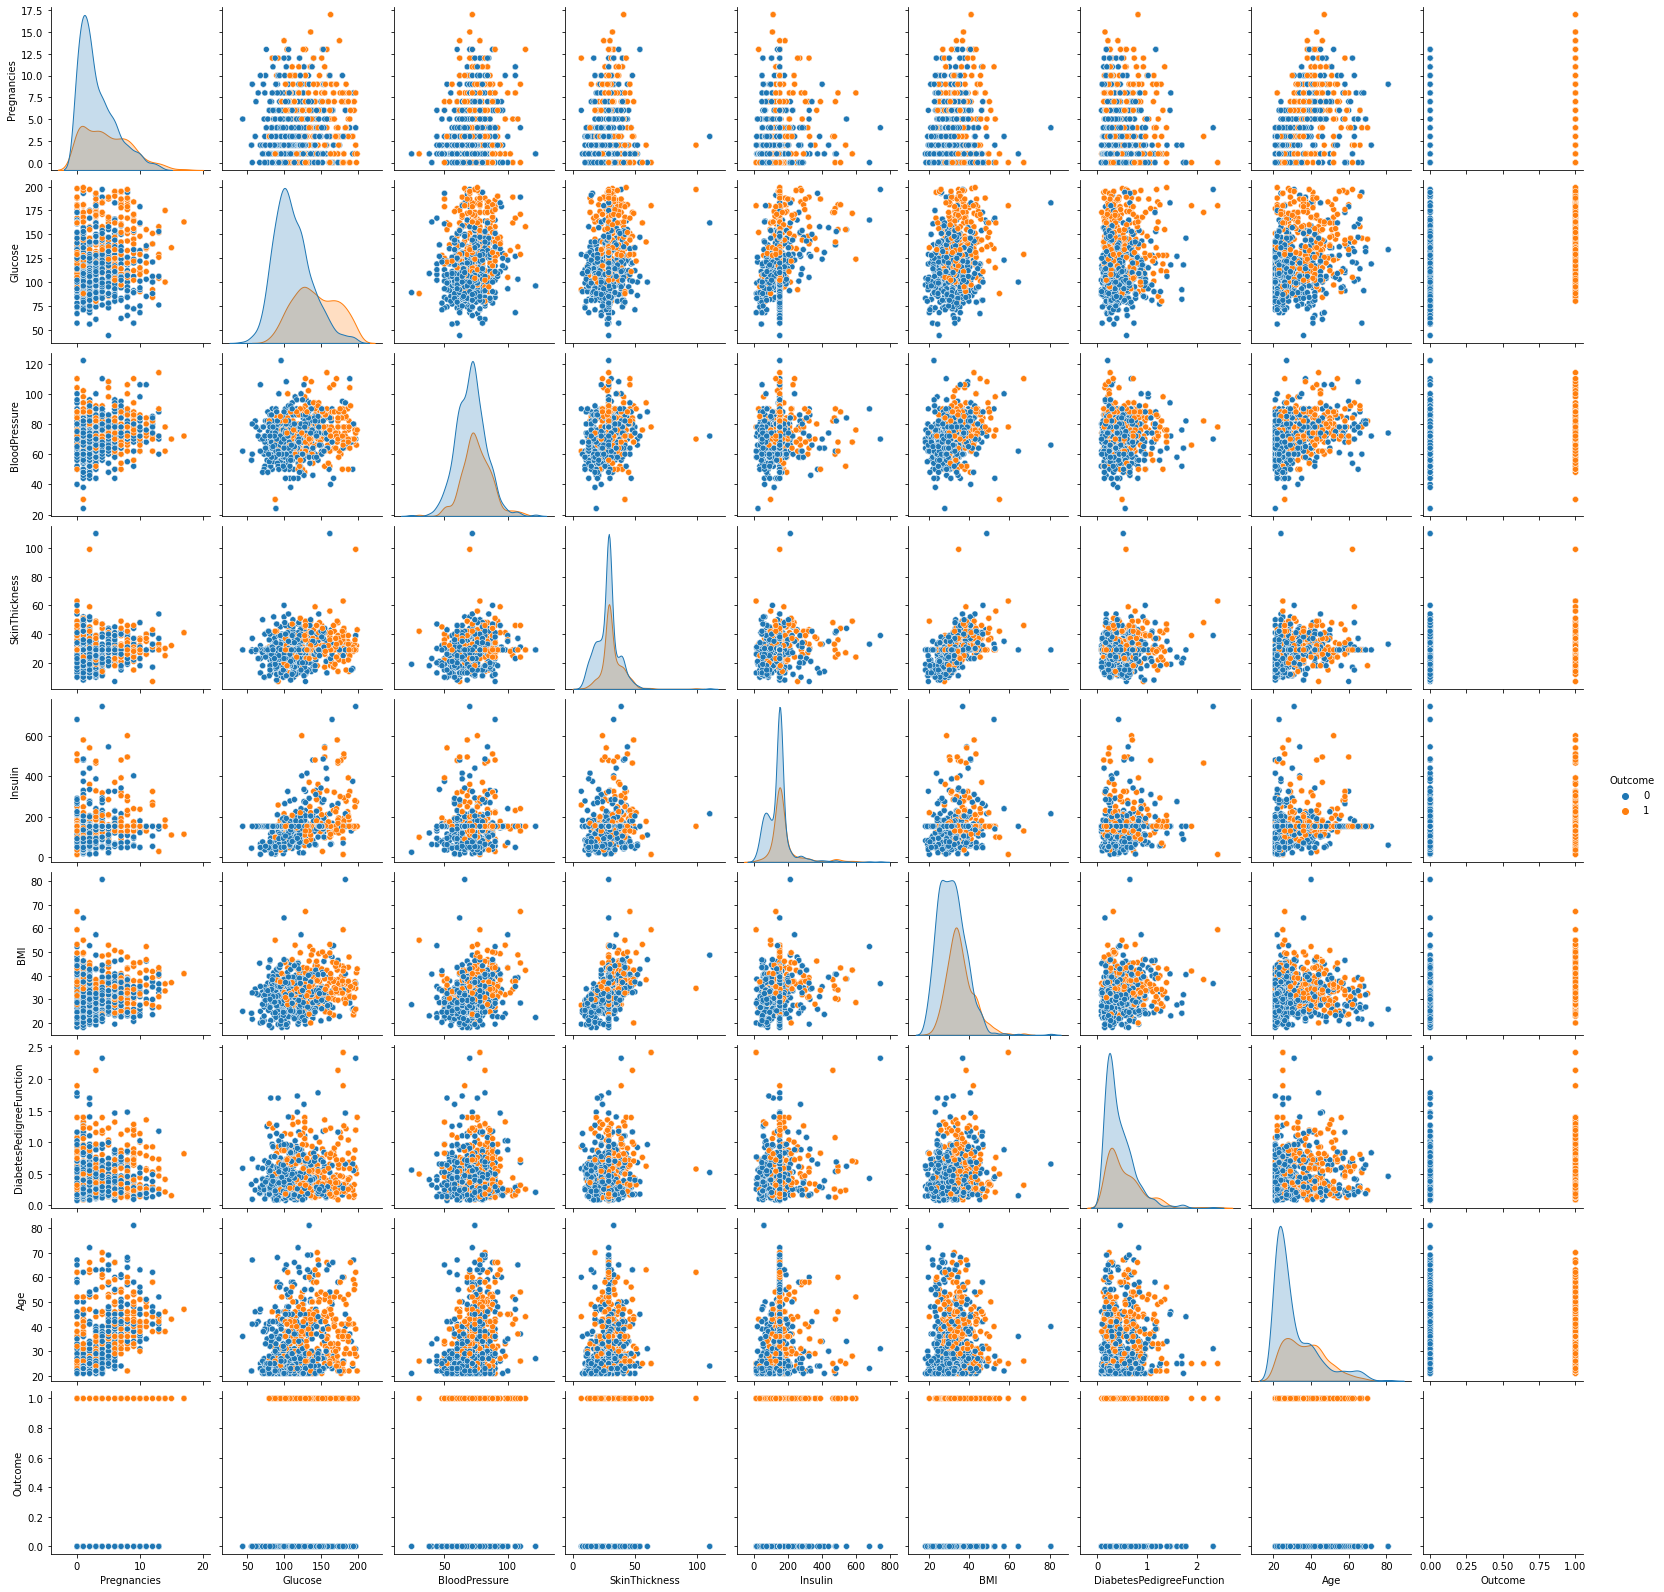

In [10]:
sns.pairplot(df, hue = "Outcome", vars = df_columns )

C:\Users\Ojo Elijah\miniconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


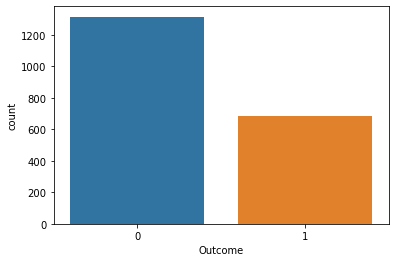

In [11]:
sns.countplot(df['Outcome']);

(9.5, -0.5)

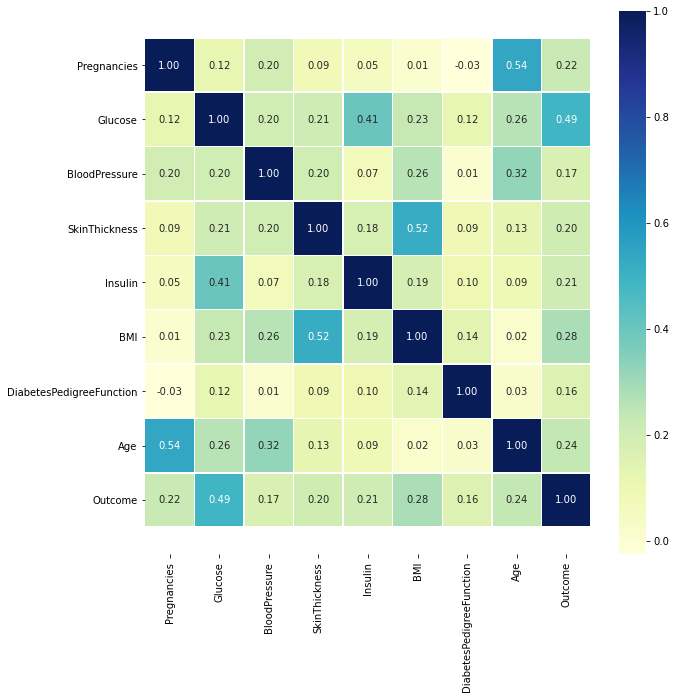

In [12]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

> From the correlation matrix, we can deduce that the Glucose and BMI are the features that contribute the most to the Outcome variable

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

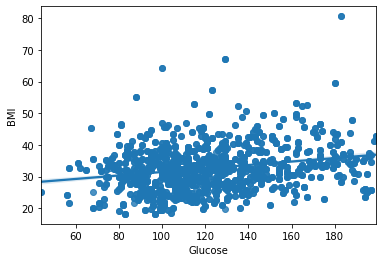

In [13]:
# Visualize dataset to derive some useful insights
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.regplot(x=df['Glucose'], y=df['BMI'])

>From this graph, it is visible that there is no direct relationship between the Glucose and BMI features<br>
Another relationship to assess is Blood glucose and Insulin:

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

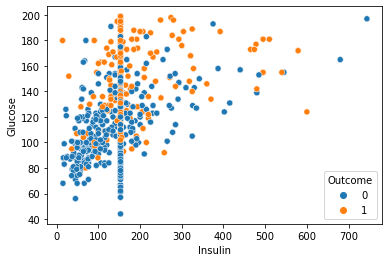

In [14]:
sns.scatterplot(x=df['Insulin'], y=df['Glucose'], hue="Outcome", data=df)

>From the graph, it is evident that the higher the level of blood glucose the more likely a person is to be diabetic.

<AxesSubplot:xlabel='BMI', ylabel='SkinThickness'>

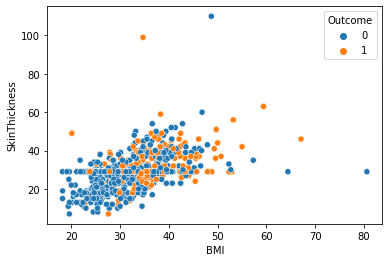

In [15]:
sns.scatterplot(x=df['BMI'], y=df['SkinThickness'], hue="Outcome", data=df)

> From the graph, there is a relationship between the probability that a person would be diagnosed as the BMI slightly increases, noting a few outliers.

## Modeling

In [45]:
# Split data into target and features

y = df.iloc[:, 8] # prediction target
X = df.iloc[:, 0:8] # prediction features
print("Done splitting into target and features")
X, y

Done splitting into target and features


(      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0               2    138.0           62.0           35.0    153.0  33.6   
 1               0     84.0           82.0           31.0    125.0  38.2   
 2               0    145.0           72.0           29.0    153.0  44.2   
 3               0    135.0           68.0           42.0    250.0  42.3   
 4               1    139.0           62.0           41.0    480.0  40.7   
 ...           ...      ...            ...            ...      ...   ...   
 1995            2     75.0           64.0           24.0     55.0  29.7   
 1996            8    179.0           72.0           42.0    130.0  32.7   
 1997            6     85.0           78.0           29.0    153.0  31.2   
 1998            0    129.0          110.0           46.0    130.0  67.1   
 1999            2     81.0           72.0           15.0     76.0  30.1   
 
       DiabetesPedigreeFunction  Age  
 0                        0.127   47  
 1      

In [46]:
# Divide data into training and validation subsets


# Set random seed
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


In [47]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

>Because KNN is an algorithm that computes distance, It assumes <i>normality</i> hence <b>scaling the features</b>. <br>
It is always advisable to bring all features to the same scale for applying distance based algorithms like <b>KNN</b>

In [48]:
#Import tools --> Modelling libraries for classification
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Import tools --> Model evaluation libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import plot_roc_curve

In [49]:
#Selecting k for model
import math
k = math.sqrt(len(y_valid))-1

#Convert to int because n_neighbors parameter des not accept float
k = int(k)
print(k)

19


In [52]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=19, p=2, metric='euclidean')

# training the model
knn.fit(X_train, y_train)

# Predict valid data set
y_pred = knn.predict(X_test)

knn.score(X_test, y_valid)

0.7975

In [53]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       272
           1       0.70      0.65      0.67       128

    accuracy                           0.80       400
   macro avg       0.77      0.76      0.76       400
weighted avg       0.79      0.80      0.80       400



> A baseline score of 0.7975 tells us we need to tune some parameters

### Hyperparameter Tuning using GridSearchCV
Using the GridSearchCV, we'll be improving our knn algorithm.

#### <b>Evaluate model</b>

In [55]:
# Evaluate model using confusion matrix
from sklearn import metrics

cm = metrics.confusion_matrix(y_valid, y_pred)
print('Confusion matrix:')
cm

Confusion matrix:


array([[236,  36],
       [ 45,  83]], dtype=int64)

In [57]:
score = metrics.accuracy_score(y_valid, y_pred)
f1score = metrics.f1_score(y_valid, y_pred)
print('Accuracy:', score)
print('F1 score:', f1score)

Accuracy: 0.7975
F1 score: 0.6720647773279352


<function matplotlib.pyplot.show(close=None, block=None)>

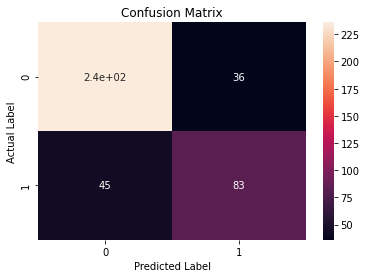

In [58]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show